### Block 1: Importer les bibliothèques

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Block 2: Créer et visualiser les données initiales

In [2]:
# Données (surface, nombre de pièces, emplacement codé en 0 pour "périphérie" et 1 pour "centre ville", prix)
data = {
    'Area (m^2)': [80, 120, 60, 100, 90, 110],
    'Rooms': [2, 3, 1, 3, 2, 4],
    'Location': [1, 0, 1, 0, 1, 0],
    'Price (€)': [200000, 250000, 150000, 220000, 210000, 240000]
}

# Création d'un DataFrame
df = pd.DataFrame(data)

# Affichage des données
print("Dataset :")
print(df)

Dataset :
   Area (m^2)  Rooms  Location  Price (€)
0          80      2         1     200000
1         120      3         0     250000
2          60      1         1     150000
3         100      3         0     220000
4          90      2         1     210000
5         110      4         0     240000


### Block 3: Préparer les données pour le modèle

In [3]:
# Séparation des features (X) et de la target (y)
X = df[['Area (m^2)', 'Rooms', 'Location']]
y = df['Price (€)']

# Division des données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Block 4: Entraîner le modèle

In [4]:
# Initialisation du modèle de régression linéaire
model = LinearRegression()

# Entraînement du modèle
model.fit(X_train, y_train)

LinearRegression()

### Block 5: Évaluer le modèle

In [5]:
# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Calcul des métriques
mse = mean_squared_error(y_test, y_pred)
try:
    r2 = r2_score(y_test, y_pred)
except ValueError:
    r2 = None  # Gestion des cas avec moins de deux échantillons

# Affichage des résultats avec formatage pour lisibilité
print("\n--- Résultats de l'évaluation ---")
print(f"Coefficients du modèle : {[f'{coef:,.2f}' for coef in model.coef_]}")
print(f"Intercept : {model.intercept_:,.2f}")
print(f"Erreur quadratique moyenne (MSE) : {mse:,.2f}")
if r2 is not None:
    print(f"Coefficient de détermination (R²) : {r2:.2f}")
else:
    print("R² : non calculable (moins de deux échantillons dans le test)")


--- Résultats de l'évaluation ---
Coefficients du modèle : ['2,000.00', '0.00', '10,000.00']
Intercept : 20,000.00
Erreur quadratique moyenne (MSE) : 100,000,000.00
Coefficient de détermination (R²) : 0.84


### Block 6: Visualiser les prédictions

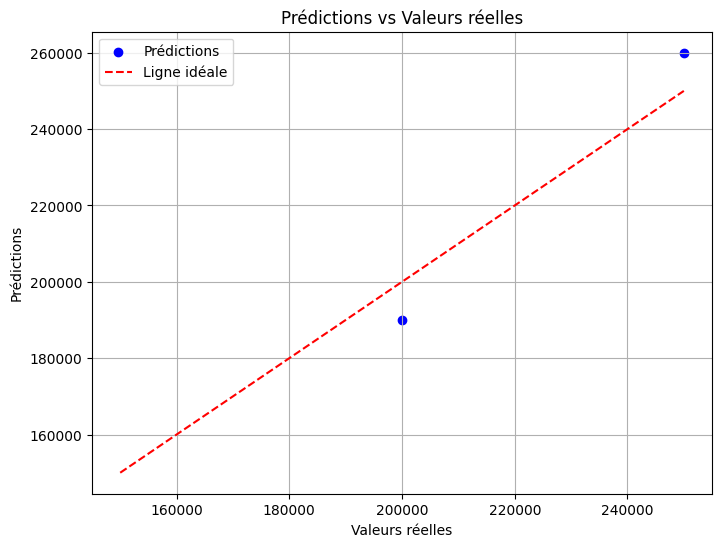

In [6]:
# Scatter plot des vraies valeurs et des prédictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Prédictions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Ligne idéale')
plt.xlabel('Valeurs réelles')
plt.ylabel('Prédictions')
plt.title('Prédictions vs Valeurs réelles')
plt.legend()
plt.grid()
plt.show()

### Block 7: Prédire sur de nouvelles données

In [7]:
# Prédire le prix d'une maison hypothétique (par exemple : 90 m^2, 2 pièces, centre ville)
house_features = pd.DataFrame([[90, 2, 1]], columns=['Area (m^2)', 'Rooms', 'Location'])
price_prediction = model.predict(house_features)

print("\n--- Prédiction pour une maison donnée ---")
print(f"Prédiction pour une maison de 90 m², 2 pièces, centre ville : {price_prediction[0]:.2f} €")


--- Prédiction pour une maison donnée ---
Prédiction pour une maison de 90 m², 2 pièces, centre ville : 210000.00 €
